# Capstone 3

## Saudi Arabia Used Car Price Prediction
[Source](https://www.kaggle.com/datasets/raihanmuhith/saudi-arabia-used-car/data)

**Context**

Pasar mobil bekas di Arab Saudi berkembang pesat seiring meningkatnya kebutuhan kendaraan dengan harga yang lebih terjangkau. Transaksi jual beli mobil bekas umumnya difasilitasi oleh dealer dan platform digital yang berperan sebagai perantara antara penjual dan pembeli. Dalam sistem ini, penjual memiliki kebebasan penuh untuk menentukan harga kendaraan berdasarkan kondisi dan spesifikasi mobil.

Namun, harga mobil bekas dipengaruhi oleh banyak faktor seperti merek, tahun pembuatan, jarak tempuh, spesifikasi mesin, dan wilayah penjualan. Kurangnya acuan harga yang objektif sering menyebabkan perbedaan harga yang signifikan untuk mobil dengan karakteristik serupa.

**Problem Statement**

Penentuan harga mobil bekas yang tepat menjadi tantangan utama di pasar mobil bekas Arab Saudi. Harga yang terlalu tinggi dapat menurunkan minat pembeli, sedangkan harga yang terlalu rendah dapat merugikan penjual. Di sisi lain, pembeli kesulitan menilai kewajaran harga karena banyaknya variasi spesifikasi kendaraan.

Oleh karena itu, diperlukan pendekatan berbasis data untuk memprediksi harga mobil bekas secara objektif dan konsisten, guna membantu penjual menetapkan harga yang kompetitif serta mendukung pembeli dalam pengambilan keputusan.

**Goals**

- Membantu penjual mobil bekas dalam menentukan harga jual yang tepat dan kompetitif menggunakan pendekatan berbasis data.

- Mengembangkan model prediksi harga mobil bekas berdasarkan karakteristik kendaraan.

- Memberikan estimasi harga yang objektif untuk mendukung keputusan penjual, pembeli, dan platform jual beli mobil bekas.

**Analytical Approach**

Analisis dilakukan dengan mengeksplorasi data untuk mengidentifikasi pola dan hubungan antara karakteristik mobil dan harga jual. Selanjutnya, data akan diproses dan digunakan untuk membangun model regresi yang mampu memprediksi harga mobil bekas secara objektif, sehingga dapat dimanfaatkan sebagai tool pendukung penentuan harga yang kompetitif bagi penjual dan platform jual beli mobil bekas.

**Metric Evaluation**

Metrik evaluasi yang digunakan dalam proyek ini adalah `RMSE`, `MAE`, dan `MAPE`. `RMSE` mengukur rata-rata akar kuadrat error, `MAE` mengukur rata-rata nilai absolut error, dan `MAPE` mengukur rata-rata persentase kesalahan prediksi. Semakin kecil nilai ketiga metrik tersebut, semakin baik performa model dalam memprediksi harga mobil bekas.

### Data Understanding

This dataset contains 5,624 used car records collected from syarah.com website. Each row represents a record of a used car. Other information (attributes) about each car are brand name, model, year of manufacture, origin, options, engine capacity, transmission type, mileage, region price, and negotiable. The following is a description of each attribute.

## Attributes Information

| Attribute     | Data Type | Description                                      |
|--------------|-----------|--------------------------------------------------|
| Type         | Object    | Car model or variant                             |
| Region       | Object    | Region where the car is listed                   |
| Make         | Object    | Car manufacturer                                 |
| Gear_Type    | Object    | Type of transmission                             |
| Origin       | Object    | Car origin                                       |
| Options      | Object    | Available car options or features                |
| Year         | Integer   | Manufacturing year                               |
| Engine_Size  | Float     | Engine capacity                                  |
| Mileage      | Integer   | Distance traveled by the car                     |
| Negotiable   | Boolean   | Indicates whether the price is negotiable        |
| Price        | Integer   | Selling price of the car                         |


In [81]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk modeling
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

**Read Dataset**

In [82]:
df = pd.read_csv('data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [84]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


### Data Cleaning

**Missing values**

In [85]:
df.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

tidak ada missing value pada dataset ini.

**Duplicate data**

In [86]:
df.duplicated().sum()

4

ada 4 data yang berupa duplikat, jadi akan saya drop.

In [87]:
df.drop_duplicates(inplace=True)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5620 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5620 non-null   object 
 1   Region       5620 non-null   object 
 2   Make         5620 non-null   object 
 3   Gear_Type    5620 non-null   object 
 4   Origin       5620 non-null   object 
 5   Options      5620 non-null   object 
 6   Year         5620 non-null   int64  
 7   Engine_Size  5620 non-null   float64
 8   Mileage      5620 non-null   int64  
 9   Negotiable   5620 non-null   bool   
 10  Price        5620 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 488.5+ KB


### EDA

**Distribusi fitur numerik**

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Engine_Size'}>],
       [<Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

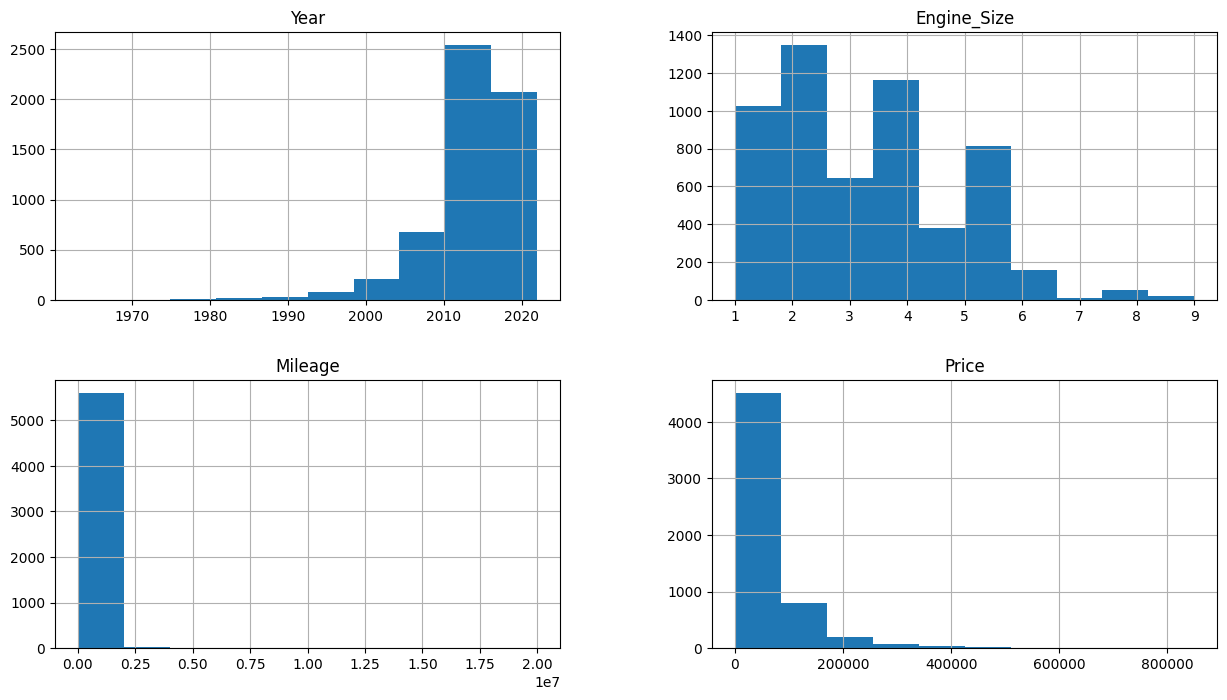

In [89]:
df.hist(figsize = (15, 8))

Berdasarkan plot distribusi, terdapat 'right-skewed distribution' pada fitur mileage dan price.

**Heatmap fitur numerik**

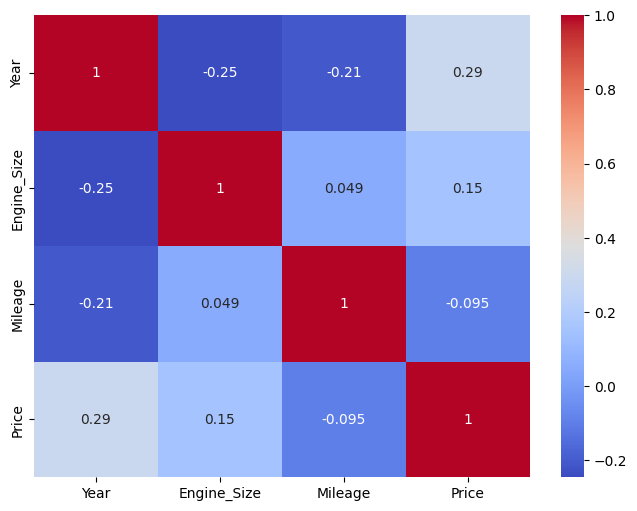

In [90]:
# Fitur numerik
numeric = df.select_dtypes(include=['int64', 'float64']).columns

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric].corr(), annot=True, cmap='coolwarm')
plt.show()

- Year vs Price (0.29) : Mobil lebih baru, cendrung lebih mahal
- Engine_Size vs Price (0.15) : Mesin besar, sedikit lebih mahal
- Mileage (-0.095) : Makin jauh jarak tempuh, semakin murah

### Data Preprocessing

**Outlier Handling**

<Axes: >

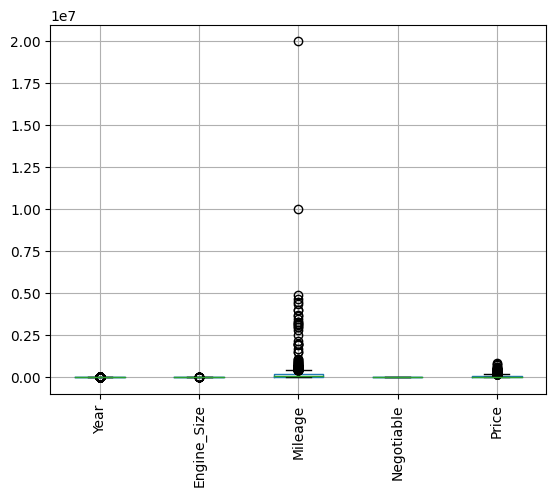

In [91]:
df.boxplot(rot=90)

ada outlier pada fitur Mileage dan Price.

In [92]:
# Fungsi untuk cek outliers
def outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

**Mileage**

In [93]:
outliers(df['Mileage'])

IQR: 158000.0
limit_bawah: -199000.0
limit_atas: 433000.0


In [94]:
df[df['Mileage'] > 433000.0].count()['Mileage']

175

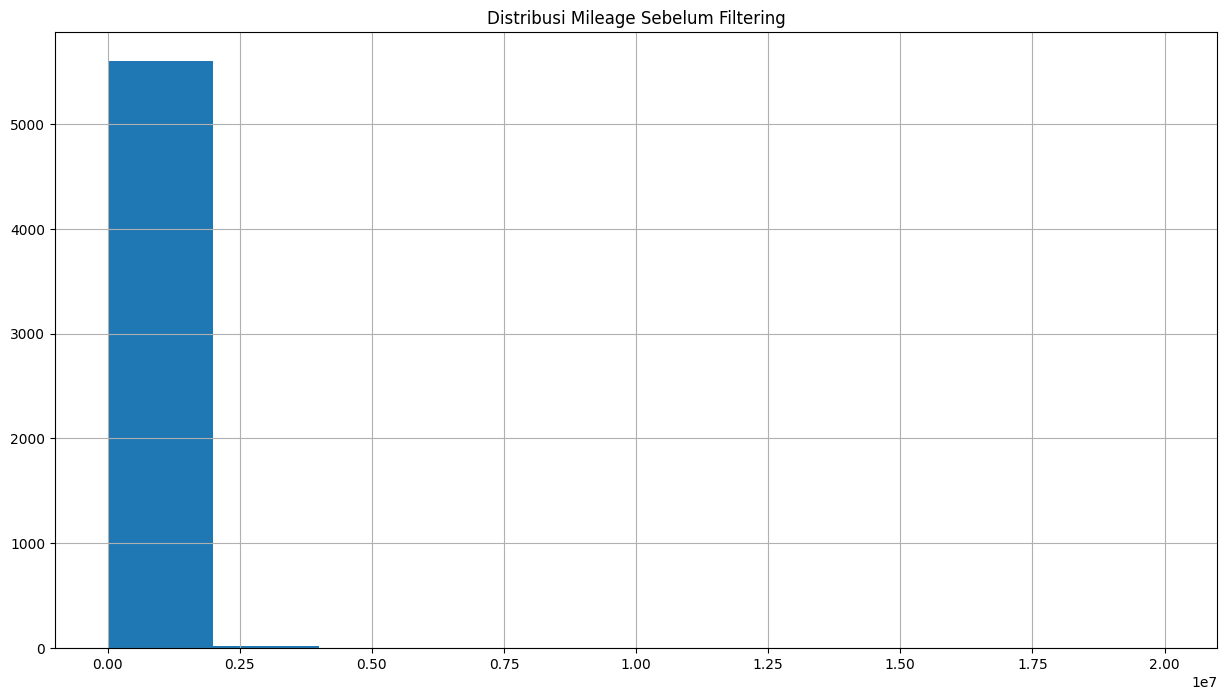

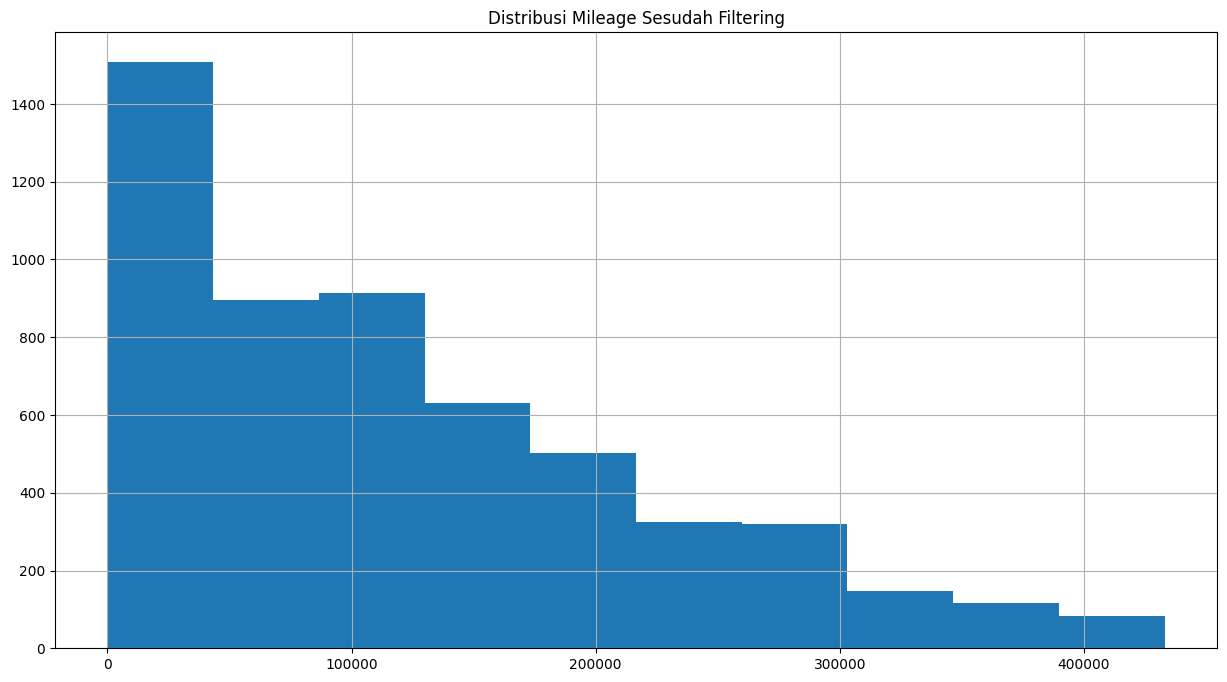

In [95]:
# Filter outlier
df_filter = df[df['Mileage'] <= 433000.0]

# Plot sebelum filter
plt.figure(figsize = (15, 8))
plt.title('Distribusi Mileage Sebelum Filtering')
df['Mileage'].hist()
plt.show()

# Plot sesudah filter
plt.figure(figsize = (15, 8))
plt.title('Distribusi Mileage Sesudah Filtering')
df_filter['Mileage'].hist()
plt.show()

Terlihat distribusi jauh lebih baik dan skewness-nya berkurang.

**Price**

Karena banyak data di price bernilai 0, maka akan didrop dulu nilai 0 tersebut karena akan memengaruhi model nanti.

In [96]:
df_filter[df_filter['Price'] == 0]['Price'].count()

1703

In [97]:
df_filter = df_filter[df_filter['Price'] != 0]

In [98]:
outliers(df_filter['Price'])

IQR: 59000.0
limit_bawah: -52500.0
limit_atas: 183500.0


In [99]:
df_filter[df_filter['Price'] > 183500.0].count()['Price']

258

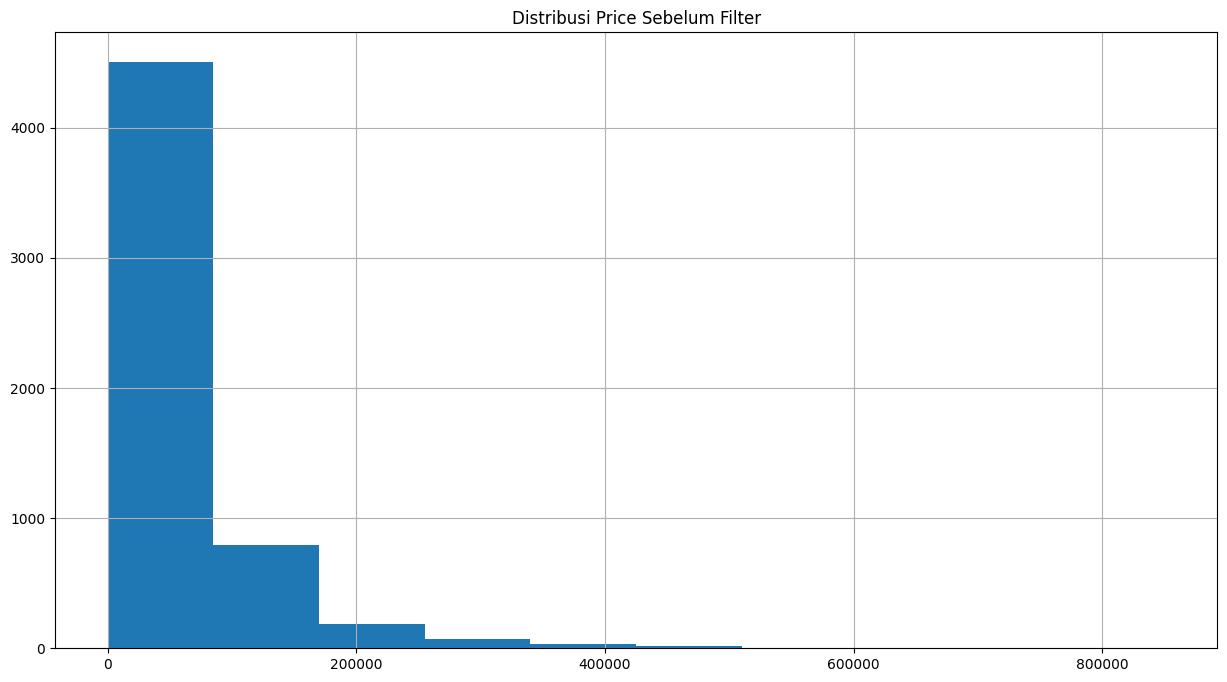

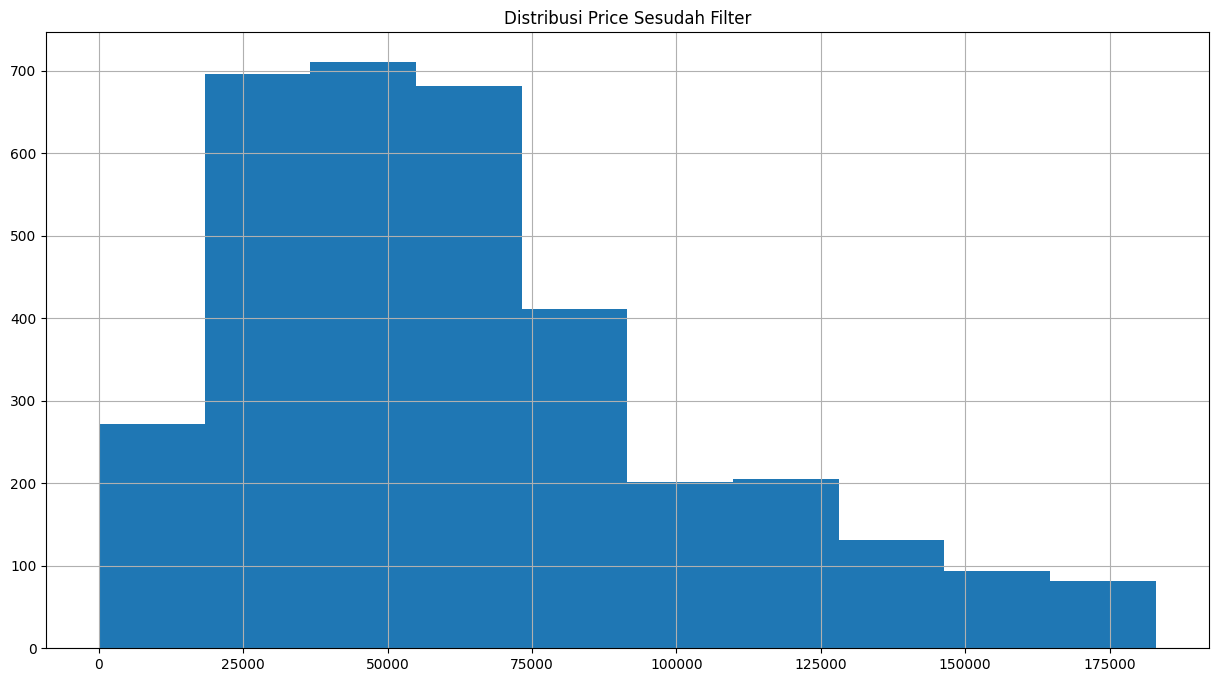

In [100]:
# Filter outlier
df_filter = df_filter[df_filter['Price'] <= 183500.0]

# Plot sebelum filter
plt.figure(figsize = (15, 8))
plt.title('Distribusi Price Sebelum Filter')
df['Price'].hist()
plt.show()

# Plot sesudah filter
plt.figure(figsize = (15, 8))
plt.title('Distribusi Price Sesudah Filter')
df_filter['Price'].hist()
plt.show()

Terlihat distribusi jauh lebih baik dan skewness-nya berkurang.

In [101]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3484 entries, 1 to 5622
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3484 non-null   object 
 1   Region       3484 non-null   object 
 2   Make         3484 non-null   object 
 3   Gear_Type    3484 non-null   object 
 4   Origin       3484 non-null   object 
 5   Options      3484 non-null   object 
 6   Year         3484 non-null   int64  
 7   Engine_Size  3484 non-null   float64
 8   Mileage      3484 non-null   int64  
 9   Negotiable   3484 non-null   bool   
 10  Price        3484 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 302.8+ KB


Didapat 3484 data akhir yang telah difilter melalui proses data cleaning dan outliers handling, selanjutnya akan dilakukan feature engineering.

### Feature Engineering

Drop fitur yang tidak penting

In [102]:
df_filter.drop(columns='Negotiable',inplace=True)

Karena model regresi tidak bisa baca data dalam bentuk string/kategori, maka perlu dikonversi fitur kategorikal menjadi numerik.

In [103]:
# Tentukan fitur untuk masing-masing metode encoding
onehot_features = ['Gear_Type', 'Origin', 'Options']
binary_features = ['Type', 'Region', 'Make', 'Mileage']

# Bangun transformer
transformer = ColumnTransformer([
    ('OneHot', OneHotEncoder(drop='first'), onehot_features),
    ('Binary', ce.BinaryEncoder(), binary_features)
], remainder='passthrough')

In [104]:
# Pisah fitur dan target
X = df_filter.drop(['Price'], axis=1)
y = df_filter['Price']

In [105]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=42)

### Modelling

**Memilih Benchmark Model**

In [106]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=42)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
    )

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
    )

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
    )

    # Output
    print(f"\n=== {i.regressor.__class__.__name__} ===")

    print(f"RMSE Fold Scores : {model_cv_rmse}")
    print(f"Mean RMSE        : {model_cv_rmse.mean():.4f}")
    print(f"Std RMSE         : {model_cv_rmse.std():.4f}")

    print(f"MAE Fold Scores  : {model_cv_mae}")
    print(f"Mean MAE         : {model_cv_mae.mean():.4f}")
    print(f"Std MAE          : {model_cv_mae.std():.4f}")

    print(f"MAPE Fold Scores : {model_cv_mape}")
    print(f"Mean MAPE        : {model_cv_mape.mean():.4f}")
    print(f"Std MAPE         : {model_cv_mape.std():.4f}")

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())



=== LinearRegression ===
RMSE Fold Scores : [-27558.76363024 -29294.19615855 -30394.53153945 -28367.09586348
 -28705.18073293]
Mean RMSE        : -28863.9536
Std RMSE         : 949.0390
MAE Fold Scores  : [-19987.99516553 -20908.91823214 -20645.28174637 -19211.27156369
 -20243.10193999]
Mean MAE         : -20199.3137
Std MAE          : 587.4055
MAPE Fold Scores : [-0.9785558  -1.03781901 -0.88339355 -1.16468556 -1.14931515]
Mean MAPE        : -1.0428
Std MAPE         : 0.1056

=== KNeighborsRegressor ===
RMSE Fold Scores : [-27404.9264643  -30438.59527344 -30420.65384605 -29499.79380911
 -28643.02210985]
Mean RMSE        : -29281.3983
Std RMSE         : 1150.0761
MAE Fold Scores  : [-19235.27177856 -20808.1696352  -21198.37268502 -20807.54680149
 -20261.93024558]
Mean MAE         : -20462.2582
Std MAE          : 682.1100
MAPE Fold Scores : [-0.99031329 -0.94859861 -0.9959124  -1.22902966 -1.2223718 ]
Mean MAPE        : -1.0772
Std MAPE         : 0.1223

=== DecisionTreeRegressor ===
R

In [107]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-28863.953585,949.038964,-20199.313730,587.405531,-1.042754,0.105607
1,KNN Regressor,-29281.398301,1150.076114,-20462.258229,682.110027,-1.077245,0.122329
2,DecisionTree Regressor,-31927.168369,489.285423,-19726.563160,365.646575,-1.195129,0.223942
3,RandomForest Regressor,-25307.295539,1777.844882,-15502.276288,767.721962,-0.965998,0.165026
4,XGBoost Regressor,-25269.176563,933.019145,-15848.761328,385.984872,-0.949611,0.136456


Model yang dipilih berdasarkan evaluasi:
1. Model `XGBoost` 
- Memiliki metrik mean **RMSE** terbaik kedua
- Memiliki metrik mean **MAE** terbaik kedua
- Memiliki metrik mean **MAPE** terbaik
2. Model `RandomForest`
 - Memiliki metrik mean **RMSE** terbaik
 - Memiliki metrik mean **MAE** terbaik
 - Memiliki metrik mean **MAPE** terbaik kedua

**Prediksi 2 model terbaik**

In [108]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,20331.335421,12991.004883,98.072777
RandomForest,22058.501709,14188.063128,116.952699


`XGBoost` memiliki nilai **RMSE**, **MAE** lebih rendah, sehingga model `XGBoost` dipilih sebagai model akhir.

**Hyperparameter Tuning**

In [109]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [110]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=42, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 42  
)

In [111]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

,estimator,"Pipeline(step...=None, ...))])"
,param_distributions,"{'model__colsample_bytree': [0.1, 0.2, ...], 'model__gamma': [1, 2, ...], 'model__learning_rate': [0.01, 0.02, ...], 'model__max_depth': [1, 2, ...], ...}"
,n_iter,50
,scoring,"['neg_root_mean_squared_error', 'neg_mean_absolute_error', ...]"
,n_jobs,-1
,refit,'neg_root_mean_squared_error'
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [112]:
# Hasil tuning dalam bentuk dataframe
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
26,0.211204,0.009969,0.024147,0.002820,0.4,1.291550,100,7,0.06,1,...,305.474386,1,-0.932632,-1.065014,-0.908536,-1.368383,-1.302138,-1.115341,0.188471,2
39,0.606057,0.036208,0.033691,0.005671,0.6,0.059948,141,10,0.03,10,...,400.512031,2,-0.972769,-1.077317,-0.904235,-1.307245,-1.343749,-1.121063,0.176166,4
18,0.358031,0.016767,0.028305,0.002707,0.2,0.059948,193,8,0.08,4,...,79.307177,3,-1.049227,-1.036461,-0.859912,-1.237574,-1.352832,-1.107201,0.171376,1
29,0.202957,0.007389,0.023541,0.002916,0.9,10.000000,138,6,0.06,6,...,183.260288,6,-1.018251,-1.077422,-0.938344,-1.274310,-1.302523,-1.122170,0.143015,5
9,0.153184,0.011192,0.021020,0.000990,0.9,0.059948,105,5,0.38,3,...,380.458289,4,-1.043743,-1.005660,-0.914609,-1.393922,-1.232201,-1.118027,0.172440,3


In [113]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -21014.834375
Best_params: {'model__subsample': 0.4, 'model__reg_alpha': 1.2915496650148828, 'model__n_estimators': 100, 'model__max_depth': 7, 'model__learning_rate': 0.06, 'model__gamma': 1, 'model__colsample_bytree': 0.7}


Prediksi pada test set dengan model XGBoost dan hyperparameter terpilih

In [114]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=42)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,20252.747764,12957.717773,136.188904


In [115]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,20331.335421,12991.004883,98.072777


In [116]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,20252.747764,12957.717773,136.188904


Nilai **RMSE**, **MAE**  berkurang sedangkan **MAPE** bertambah, ini berarti hyperparameter tuning meningkatkan hanya sedikit performa model.

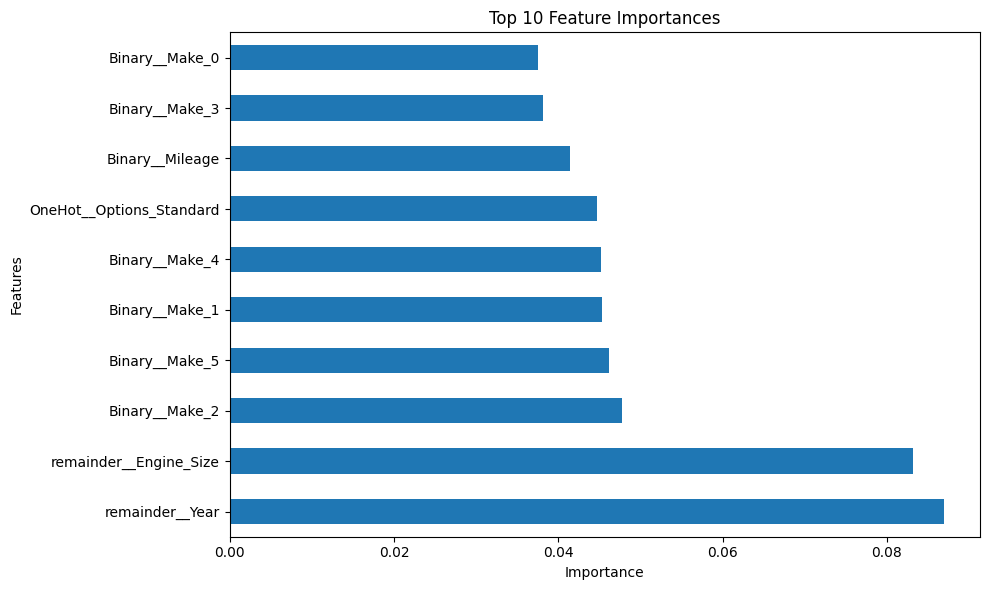

In [117]:
# Plot feature importances
feature_imp = pd.Series(
    xgb_tuning['model'].feature_importances_, 
    index=transformer.get_feature_names_out()
).sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
feature_imp.plot(kind='barh', title='Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

### Kesimpulan

Berdasarkan analisis, fitur `Year` memiliki korelasi positif (0.29), artinya mobil lebih baru cendrung lebih mahal. Dan fitur `Engine_Size` memiliki korelasi positif (0.15), artinya mesin besar sedikit lebih mahal.

Berdasarkan pemodelan, fitur `Year` dan `Engine_Size` menjadi fitur yang paling berpengaruh terhadap `Price`. Dan berdasarkan performanya setelah dilakukan hyperparameter tuning, bisa meningkatkan sangat lecil performa model tersebut.


### Rekomendasi

**Rekomendasi Bisnis**
- Menjadikan usia kendaraan sebagai pertimbangan utama dalam penentuan harga dan strategi penawaran, karena mobil yang lebih baru memiliki kecenderungan harga lebih tinggi.

- Menggunakan kapasitas mesin (Engine_Size) sebagai nilai tambah dalam membedakan produk, khususnya pada kendaraan dengan karakteristik lain yang relatif serupa.

- Mengatur stok kendaraan dengan menyeimbangkan mobil keluaran terbaru dan spesifikasi mesin, untuk memaksimalkan potensi pendapatan.

**Rekomendasi Model**
- Memperbarui dataset agar model dapat menangkap variasi harga mobil bekas dengan lebih baik.

- Menambahkan fitur baru seperti kondisi kendaraan, seperti kondisi fisik atau riwayat perawatan, untuk meningkatkan kemampuan prediksi.

- Mengeksplorasi pemodelan lain atau kombinasi beberapa model untuk memperoleh peningkatan performa yang lebih baik.

**Save Model**

In [118]:
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_UsedCarPrediction.sav', 'wb'))

In [119]:
#Load model
filename = 'Model_UsedCarPrediction.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [120]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

20331.335420970263